***

# Single Layer Perceptron

***

#### What is it?

> Single Layer Perceptron is a machine learning algorithm used for binary classification. It is considered to be a type of Neural Network model with only one layer.

#### How does it work?

> The Perceptron model computes a weighted sum of input features (plus a bias term) and passes it through an activation function that returns a final output. A Perceptron can be broken down into five parts:

        - Input values
        - Weights and Bias
        - Weighted sum
        - Activation function
        - Output

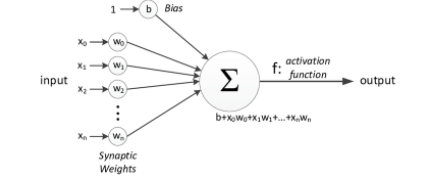


> There are a few different activation functions can be used with Perceptron. They are shown in the table below:


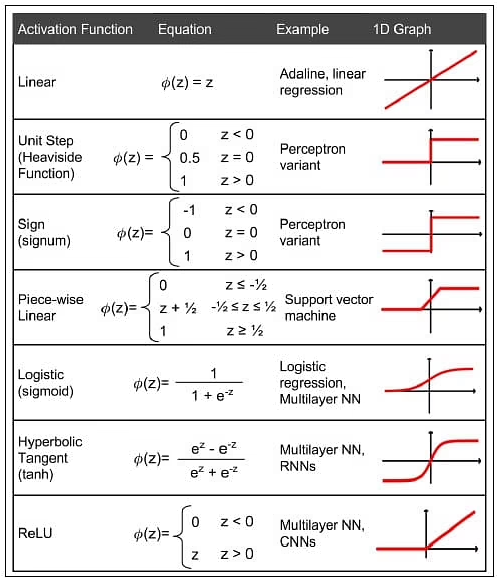


> When passing weighted sums to the sign activation function, if the output is greater than zero, then the new output is 1. Otherwise the new output is -1. This is used to classify data points. Observations with an output of 1 belong to class 1, while observations with an output of -1 should belong to class 2.


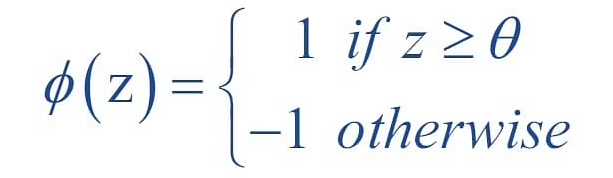


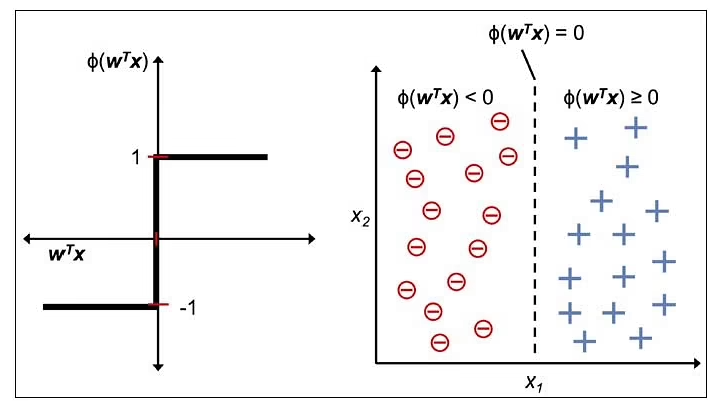

> To train a Perceptron, changes are made to the weights iteratively until the best weights are found so that the activity function produces a line with the correct orientation and slope that linearly separates the data.

> Steps:

        -1. Initialize weights to 0 or small random numbers
        -2. For each training observation:
            -Calculate the output value (class value predicted by activation function)
            -Update weights 
        
> The value for updating weights at each iteration is calculated by the learning rule where:

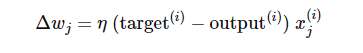

        - n, or alpha, is the learning rate
        - target is the true class label
        - output is the predicted class label
      

> In the case where the Single Layer Perceptron predicts the class correctly, the weights remain unchanged.

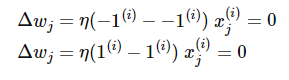

> Conversely, when the Single Layer Perceptron predicts the class incorrectly, the weights are changed and "pushed" towards the direction of the positive or negative class, respectively.


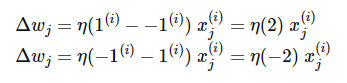


#### Model Assumptions

> Below are Single Layer Perceptron model assumptions:

        - Data should be linearly separable (data can be separated by a line)
        

### Model Implementation

> Below is an implementation of the Single Layer Perceptron model on a dataset. 

#### Libraries Used

> A list of libraries used for data visualizations, data preparation, and model building:

[Matplotlib](https://matplotlib.org/)


[Pandas](https://pandas.pydata.org/)


[Numpy](https://numpy.org/)


[Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/)

In [1]:
#import libraries

import matplotlib.pyplot as plt

import pandas as pd

import numpy as np

import matplotlib.patches as mpatches

from collections import Counter

#### Data Preparation

>Before model building and model implementation, a dataset will be prepared for use. Below, the Palmer Penguins dataset is imported. Only two species will be used in the final dataset, so the first 276 rows will be selected from the dataframe (as seen below). For more information on the dataset, you can scroll up to the "Libraries Used" header and select the hyper link "Palmer Penguins" or click [here](https://allisonhorst.github.io/palmerpenguins/).

In [2]:
#import palmer penguins data
from palmerpenguins import load_penguins

#load palmer penguins data
penguins = load_penguins()

#select rows with first two species only, adelie and gentoo
penguins = penguins.iloc[:276]

#veiw penguins dataframe
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2009
272,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,female,2009
273,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,male,2009
274,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,female,2009


> Since the data contains NaN for a couple of the observations, I will drop all rows containing the value to avoid any issues with model implementation later on. After dropping the rows, 265 rows remain.

In [3]:
#drop rows with NaN
df = penguins.dropna() 
df.reset_index(inplace = True)
df

,index,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...,...
260,270,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,female,2009
261,272,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,female,2009
262,273,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,male,2009
263,274,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,female,2009


> The data is then split into an array containing features and an array containing the responses/labels. Body mass and bill depth are selected as features, while the response is species (Adelie or Gentoo). 

In [4]:
#features
X = df[["bill_depth_mm","body_mass_g"]].to_numpy()

#response/labels
y = df["species"].to_numpy()


#### Visualizing the data:

> With the data now mostly prepped, we can visualize the features and response on a scatter plot. Below, penguin features are plotted and colored by species type. We can see that there is a somewhat clear separation of the data points within each class/species. So the data seems more or less linearly separable.

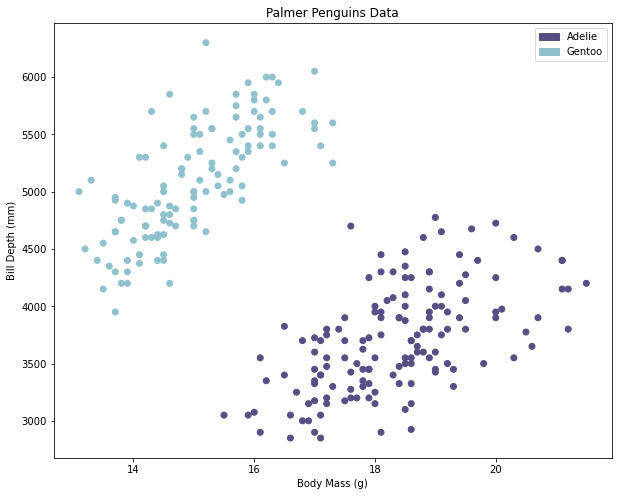

In [5]:
#plot of data
colors = ["#574E84" if label == "Adelie" else "#90C2CE" for label in y]


plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c = colors)
plt.xlabel("Body Mass (g)")
plt.ylabel("Bill Depth (mm)")
plt.title("Palmer Penguins Data")

purple_patch = mpatches.Patch(color='#574E84', label='Adelie')
blue_patch = mpatches.Patch(color='#90C2CE', label='Gentoo')
plt.legend(handles=[purple_patch, blue_patch])

plt.show()

> A "third feature" is then added to X containing all ones. This is for the bias term.

In [6]:
#adding addtional value of ones to array
X = df[["bill_depth_mm", "body_mass_g"]]

X["ones"] = np.ones(265)

#converting to array
X = X.to_numpy()

<ipython-input-6-fa9a5c9061ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["ones"] = np.ones(265)


> Finally, species is coded as 1 for Adelie and -1 for Gentoo. These values are chosen since we are using the sign activation function. This is seen below.

In [7]:
#if Adelie, change value to 1, else change to -1
for i in range(265):
    if y[i] == "Adelie":
        y[i] = 1
    else:
        y[i] = -1
        
#check if values were changed
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, 

#### Model Building

> Now that data preparation is complete, we can build the model.

> Below, is the function for the sign activation function.

In [8]:
def sign(x, y):
    
    if x @ y > 0:
        return 1.0
    else:
        return -1.0

> Here is a function to calculate the loss.

In [9]:
def L(w, features = X, labels = y):
    return sum(.5*(sign(w, x) - labels[i])**2 for i, x in enumerate(features))

> Below is a function for the learning rule (a portion of it).

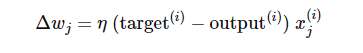

> Also, iterations (epochs) and the learning rate (alpha) are given values below.


In [10]:
#learning rule
def grad_approx(w, x, y):
    return (sign(w,x) - y)*x

def full_grad_approx(w, features=X, labels=y):
    return sum((sign(w,x) - labels[i])*x for i, x in enumerate(features))

# set epochs/iterations
epochs = 5000

# set alpha/lr
alpha = .5

#### Using Model on Prepared Data

> Below, the model is trained using the prepared data.

    -1. Initialize weights to 0 or small random numbers
    -2. For each training observation:
        -Calculate the output value (class value predicted by activation function)
        -Update weights 

> The outputted plot of Loss v. Iteration shows loss for each iteration in model training.

The Loss before implementing stochastic approx gradient descent = 238.0
The Loss after implementing stochastic approx gradient descent = 0.0


Text(0.5, 1.0, 'Loss v. Iteration')

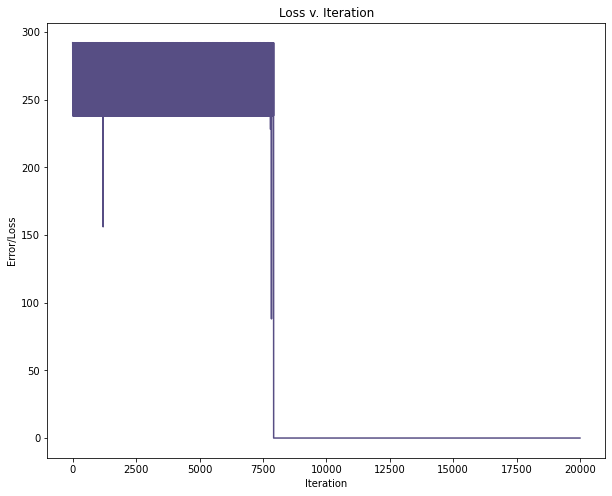

In [11]:
#intialize weights as small random numbers
w = np.random.rand(3)

print(f"The Loss before implementing stochastic approx gradient descent = {L(w)}")

#list to store loss
losses = []
for epoch in range(20000):
    
    #calculate output value and update weights
    w = w - alpha*full_grad_approx(w)
    
    #append error to losses
    losses.append(L(w))
    
print(f"The Loss after implementing stochastic approx gradient descent = {L(w)}")
plt.figure(figsize=(10, 8))
plt.plot(losses, color = "#574E84")
plt.xlabel("Iteration")
plt.ylabel("Error/Loss")
plt.title("Loss v. Iteration")

#### Model Evaluation

> To find the model decision boundary, we can set z = 0 and solve for x2 (as seen below).

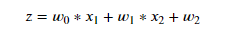

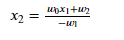

> We can then plug in the optimal values for the weights given to us by the model to get the decision boundary line.

> Below, the decision boundary is plotted along with features bill depth and body mass. We can see that the decision boundary successfully separates the data into two classes (species Adelie and Gentoo).

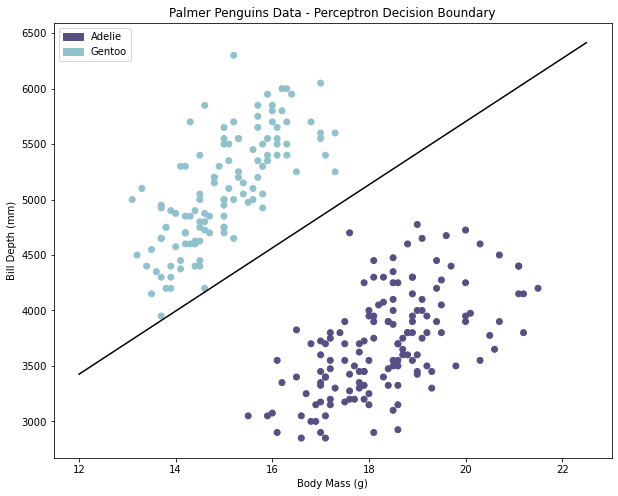

In [12]:
domain = np.arange(12, 23, .5)

#decision boundary line
line = [(w[0]*x + w[2])/-w[1] for x in domain]

colors = ["#574E84" if label == 1 else "#90C2CE" for label in y]


plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c = colors)

plt.plot(domain, 
         line, 
         label = 'seperator', 
         color='black')


plt.xlabel("Body Mass (g)")
plt.ylabel("Bill Depth (mm)")
plt.title("Palmer Penguins Data - Perceptron Decision Boundary")

purple_patch = mpatches.Patch(color='#574E84', label='Adelie')

blue_patch = mpatches.Patch(color='#90C2CE', label='Gentoo')

plt.legend(handles=[purple_patch, blue_patch])

plt.show()

> This concludes the section on Single Layer Perceptron.

***

# Multi-layer Perceptron

***

#### What is it?

> Multi-layer Perceptron is a neural network algorithm where the mapping between inputs and out put is non-linear. A multi-layer perceptron has one or more hidden layers with neurons stacked together. The neurons have activation functions that impose a threshold. Multi-layer perceptron can be split into two parts: Feedfoward and Backpropagation.

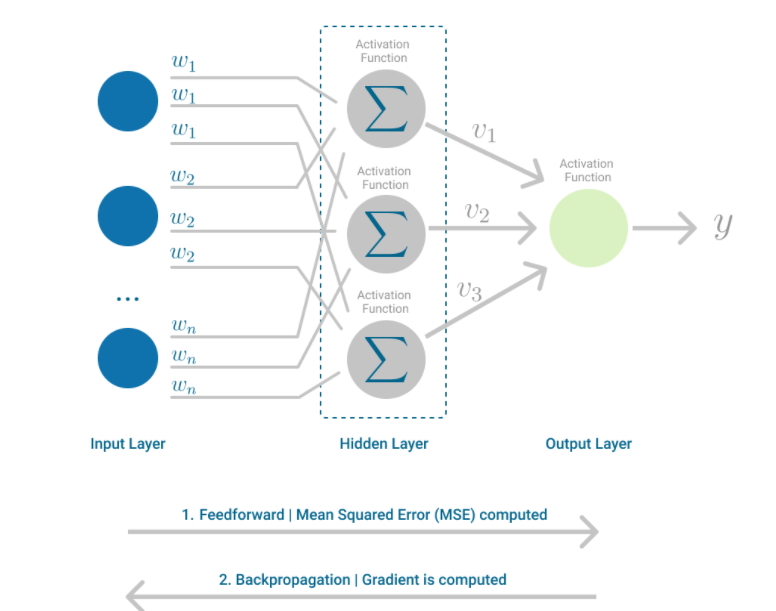

### Model Implementation

> Below is an implementation of the Multi-Layer Perceptron model on a dataset using Scikit Learn. The MLP will be used for a classification task.

#### Libraries Used

> A list of libraries used for data visualizations, data preparation, and model building:

[MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

[Scikit Learn Model Selection - train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

[Scikit Learn Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn-metrics-confusion-matrix)

[Scikit Learn Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

[Seaborn](https://seaborn.pydata.org/)

In [13]:
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

import seaborn as sns

#### Data preparation

> Before model building and model implementation, a dataset will be prepared for use. Below, the Palmer Penguins dataset is used. This time, all species will be used for the response, while bill length, bill depth, flipper length, and body mass are the features. 

In [14]:
#drop rows with NaN
penguins = load_penguins()
penguins = penguins.dropna() 
penguins.reset_index(inplace = True)

#select features
X = penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].to_numpy()

#select species as response
y = penguins["species"]


> Next, the data is then divided into train and test sets. The MLP classification model will first be trained with the data in the training sets and then tested with the data in the test sets. Below, 80% of the data will be used to train the model, while 20% of the data will be used to test the model.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                        random_state=1, test_size=0.2)

#scale data
sc_X = StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

#### Model Building

> Now that data preparation is complete, we can build the model. This MLP model has five layers, three of them being hidden layers. The ReLU activation functions is being used.  Below, the model is trained by passing X_train and y_train to clf.fit(). Afterwards, predictions are made by passing X_test to clf.predict().

In [16]:
clf = MLPClassifier(hidden_layer_sizes=(128,64,32),
                    activation="relu",random_state=1)

#train model
clf.fit(X_train, y_train)

#make predictions
y_pred=clf.predict(X_test)


#### Model Evaluation

> Below, a classification report was generated to measure how well the classification algorithm was at predicting. 

> Accuracy: Shows us a fraction of the correct predictions. 
        
        - TP + TN / TP + TN + FP + FN
        - Number of correct predictions/ total number of predictions
        
> Precision: Precision tell us how many of the values the model predicted to be in a certain class actually belong to that class. 

        - TP/ TP +FP

> Recall: Recall is the measure of how many positive cases the classifier correctly classified over all the positive cases in the data. Recall is used to select the best model when there is a high cost associated with false negative. 

        - TP / TP + FN
        
>F1 Score: The F1 score is a function of recall and precision. F1 score is important when you want to seek balance between recall and precision

        - 2 * (Precision * Recall / Precision + Recall)

> Based on the accuracy score, the model has a decent accuracy score at about 0.985. Therefore, the model is about 99% accurate at predicting labels for this dataset. Precision for Adelie, Chinstrap, and Gentoo are 0.97, 1.00, and 1.00 respectively.

In [17]:
#classification report
print(classification_report(y_test, y_pred))

#accuracy
print(sum(y_test == y_pred) / len(y_test))

print(clf.score(X_test, y_test))

# print(Counter(y_test))
# Counter(y_pred)

              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.98        28
   Chinstrap       1.00      0.92      0.96        13
      Gentoo       1.00      1.00      1.00        26

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67

0.9850746268656716
0.9850746268656716


> Below, is a confusion matrix. A confusion matrix is a two-dimensional table that allows us to visualize the correctly labeled and incorrectly labeled instances by a classifier. The confusion matrix below tells us the following:

        - There are 28 observations labeled Adelie, 13 Chinstrap, and 26 Gentoo
        - The model predicted that there are 29 observations labeled Adelie, 12 Chinstrap, and 26 Gentoo
        
        - There are 28 observations correctly classified as Adelie 
        - There are 0 observations incorrectly classified as Chinstrap, when it should be Adelie 
        - There are 0 observations incorrectly classified as Gentoo, when it should be Adelie 
        
        - There are 12 observations correctly classified as Chinstrap 
        - There is 1 observation incorrectly classified as Adelie, when it should be Chinstrap
        - There are 0 observations incorrectly classified as Gentoo, when it should be Chinstrap
        
        - There are 26 observations correctly classified as Gentoo 
        - There are 0 observations incorrectly classified as Adelie, when it should be Gentoo 
        - There are 0 observations incorrectly classified as Chinstrap, when it should be Gentoo 

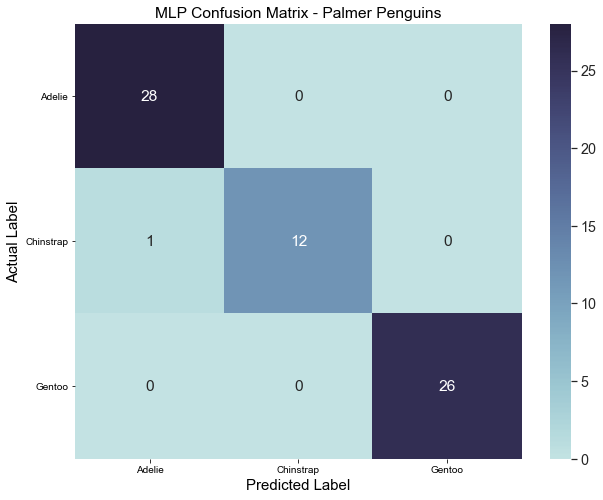

In [18]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)

matrix_df = pd.DataFrame(cm)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True))

labels = ["Adelie", "Chinstrap", "Gentoo"]
ax.set_title("MLP Confusion Matrix - Palmer Penguins")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(labels)
ax.set_ylabel("Actual Label", fontsize=15)
ax.set_yticklabels(labels, rotation=0)
plt.show()

>  This concludes the section on Multi-Layer Perceptron.